<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_set/data.csv')
dataset.head()

,2.098745172099389933e-01,2.002906846795961204e+00
0,1.925265,1.782311
1,0.885361,0.141400
2,1.606608,1.885941
3,1.511095,1.234464
4,2.248156,0.440106


In [5]:
data = dataset.values
data

array([[ 1.92526462,  1.78231119],
       [ 0.88536093,  0.14140021],
       [ 1.60660797,  1.88594078],
       ...,
       [13.82291516,  4.75885049],
       [13.2021102 ,  4.22339449],
       [12.5536414 ,  4.7778492 ]])

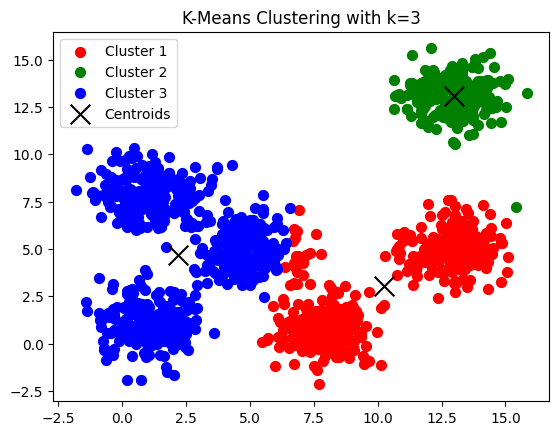

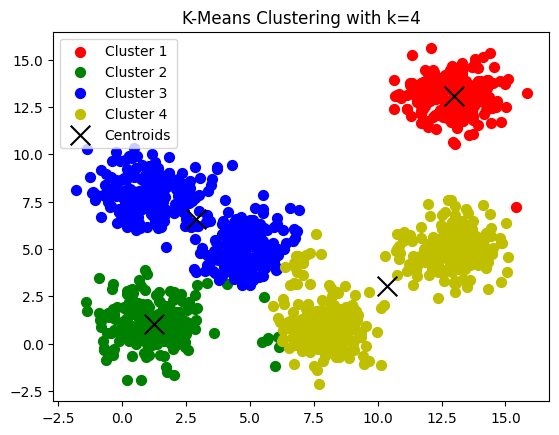

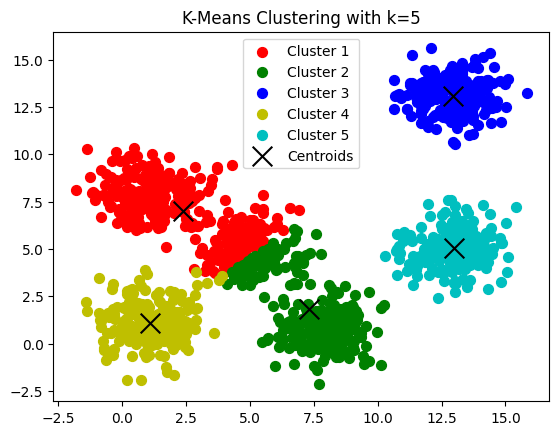

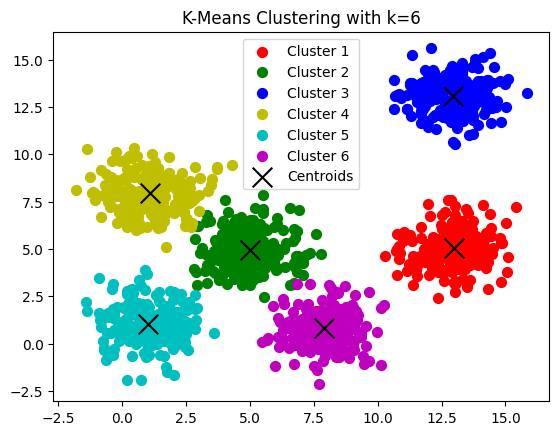

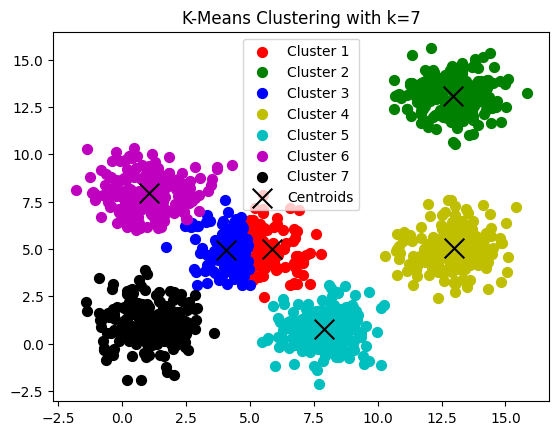

In [7]:

def euclidean_distance_matrix(data, centroids):
    return np.sqrt(((data[:, np.newaxis] - centroids) ** 2).sum(axis=2))

def kmeans_clustering(data, k, max_iterations=100):
    n_samples, n_features = data.shape

    centroids = data[random.sample(range(n_samples), k)]

    clusters = np.zeros(n_samples)

    for _ in range(max_iterations):
        distances = euclidean_distance_matrix(data, centroids)
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

def visualize_clusters(data, clusters, centroids, k):
    """Visualize the clusters with different colors."""
    colors = ["r", "g", "b", "y", "c", "m", "k"][:k]
    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[i], label=f"Cluster {i+1}")

    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="black", marker="x", label="Centroids")
    plt.title(f"K-Means Clustering with k={k}")
    plt.legend()
    plt.show()

ks = [3, 4, 5, 6, 7]
for k in ks:
    clusters, centroids = kmeans_clustering(data, k)
    visualize_clusters(data, clusters, centroids, k)
